In [1]:
import wooldridge as woo
import pandas as pd
from statsmodels.formula.api import ols
from statsmodels.stats.diagnostic import het_breuschpagan as breuschpagan
from statsmodels.stats.diagnostic import het_white as whites
from statsmodels.stats.diagnostic import linear_reset as reset
import seaborn as sns
import gretltests
import matplotlib.pyplot as plt
import numpy as np
plt.rcParams['figure.figsize'] = [10, 8]

# Interactive Session 14

In [2]:
hprice=woo.data('hprice1')
woo.data('hprice1',description=True)

name of dataset: hprice1
no of variables: 10
no of observations: 88

+----------+------------------------------+
| variable | label                        |
+----------+------------------------------+
| price    | house price, $1000s          |
| assess   | assessed value, $1000s       |
| bdrms    | number of bdrms              |
| lotsize  | size of lot in square feet   |
| sqrft    | size of house in square feet |
| colonial | =1 if home is colonial style |
| lprice   | log(price)                   |
| lassess  | log(assess                   |
| llotsize | log(lotsize)                 |
| lsqrft   | log(sqrft)                   |
+----------+------------------------------+

Collected from the real estate pages of the Boston Globe during 1990.
These are homes that sold in the Boston, MA area.


In [3]:
hprice

price      assess  bdrms  lotsize  sqrft  colonial    lprice   lassess  \
0   300.0  349.100006      4   6126.0   2438         1  5.703783  5.855359   
1   370.0  351.500000      3   9903.0   2076         1  5.913503  5.862210   
2   191.0  217.699997      3   5200.0   1374         0  5.252274  5.383118   
3   195.0  231.800003      3   4600.0   1448         1  5.273000  5.445875   
4   373.0  319.100006      4   6095.0   2514         1  5.921578  5.765504   
..    ...         ...    ...      ...    ...       ...       ...       ...   
83  295.0  318.299988      3   6056.0   1837         1  5.686975  5.762994   
84  236.0  259.399994      3   5828.0   1715         0  5.463832  5.558371   
85  202.5  258.100006      3   6341.0   1574         0  5.310740  5.553347   
86  219.0  232.000000      2   6362.0   1185         0  5.389072  5.446737   
87  242.0  252.000000      4   4950.0   1774         1  5.488938  5.529429   

    llotsize    lsqrft  
0   8.720297  7.798934  
1   9.200593  7.638198  
2   8.556414  7.225482  
3   8.433811  7.277938  
4   8.715224  7.829630  
..       ...       ...  
83  8.708805  7.515889  
84  8.670429  7.447168  
85  8.754792  7.361375  
86  8.758098  7.077498  
87  8.507143  7.480992  

[88 rows x 10 columns]

In [4]:
mod0=ols('lprice~bdrms+colonial+llotsize+lsqrft',data=hprice).fit()
print(mod0.summary())

                            OLS Regression Results                            
Dep. Variable:                 lprice   R-squared:                       0.649
Model:                            OLS   Adj. R-squared:                  0.632
Method:                 Least Squares   F-statistic:                     38.38
Date:                Sat, 07 Jan 2023   Prob (F-statistic):           3.74e-18
Time:                        09:20:42   Log-Likelihood:                 26.619
No. Observations:                  88   AIC:                            -43.24
Df Residuals:                      83   BIC:                            -30.85
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -1.3496      0.651     -2.073      0.0

In [5]:
#If you add the predicted values into a data frame then if it contains missing values it will not do it
#Therefore, I have created a command that exludes the missing values from the regression using the augment data command
#This command creates a new data frame with the data using in the regression with errors, errorsquare and predicted values
#If there are no missing values in the regression data you could add them directly
from augmentdata import augmentdata
hprice_=augmentdata(mod0)
hprice_

Intercept  bdrms  colonial  llotsize    lsqrft    lprice      yhat  \
0         1.0    4.0       1.0  8.720297  7.798934  5.703783  5.790312   
1         1.0    3.0       1.0  9.200593  7.638198  5.913503  5.730414   
2         1.0    3.0       0.0  8.556414  7.225482  5.252274  5.276641   
3         1.0    3.0       1.0  8.433811  7.277938  5.273000  5.346960   
4         1.0    4.0       1.0  8.715224  7.829630  5.921578  5.811169   
..        ...    ...       ...       ...       ...       ...       ...   
83        1.0    3.0       1.0  8.708805  7.515889  5.686975  5.561386   
84        1.0    3.0       0.0  8.670429  7.447168  5.463832  5.452551   
85        1.0    3.0       0.0  8.754792  7.361375  5.310740  5.406036   
86        1.0    2.0       0.0  8.758098  7.077498  5.389072  5.179004   
87        1.0    4.0       1.0  8.507143  7.480992  5.488938  5.529695   

        yhat2         e        e2       e_l  
0   33.527715 -0.086530  0.007487       NaN  
1   32.837641  0.183089  0.033522 -0.086530  
2   27.842945 -0.024368  0.000594  0.183089  
3   28.589979 -0.073960  0.005470 -0.024368  
4   33.769691  0.110409  0.012190 -0.073960  
..        ...       ...       ...       ...  
83  30.929016  0.125589  0.015773 -0.226758  
84  29.730311  0.011281  0.000127  0.125589  
85  29.225229 -0.095296  0.009081  0.011281  
86  26.822087  0.210067  0.044128 -0.095296  
87  30.577527 -0.040757  0.001661  0.210067  

[88 rows x 11 columns]

<AxesSubplot:xlabel='lsqrft', ylabel='e'>

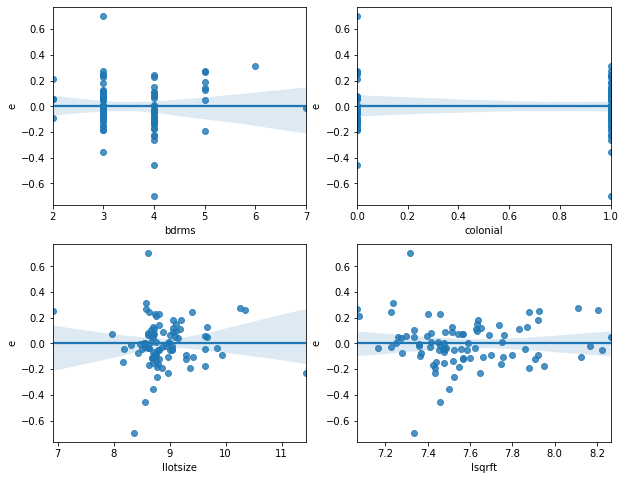

In [6]:
fig,ax=plt.subplots(2,2)
sns.regplot(y='e',x='bdrms',data=hprice_,ax=ax[0,0])
sns.regplot(y='e',x='colonial',data=hprice_,ax=ax[0,1])
sns.regplot(y='e',x='llotsize',data=hprice_,ax=ax[1,0])
sns.regplot(y='e',x='lsqrft',data=hprice_,ax=ax[1,1])

In [7]:
print('\nThe breuschpagan is the non-robust version and the Whites test includes all the interaction terms (not squares only)')
bp1=breuschpagan(mod0.resid,mod0.model.exog,robust=False)
bp2=breuschpagan(mod0.resid,mod0.model.exog,robust=True)
wh=whites(mod0.resid,mod0.model.exog)
print('\nbreuschpagan:','LM',bp1[0],'LM-pval',bp1[1],': F',bp1[2],'F-pval',bp1[3])
print('\nbreuschpagan:','LM',bp2[0],'LM-pval',bp2[1],': F',bp2[2],'F-pval',bp2[3])
print('\nwhites      :','LM',wh[0],'LM-pval',wh[1],': F',wh[2],'F-pval',wh[3])



The breuschpagan is the non-robust version and the Whites test includes all the interaction terms (not squares only)

breuschpagan: LM 16.917202105067446 LM-pval 0.0020058716777875264 : F 1.4947962099739043 F-pval 0.21123282235883617

breuschpagan: LM 5.91338599985571 LM-pval 0.20571070855632514 : F 1.4947962099738967 F-pval 0.21123282235883908

whites      : LM 11.773985467092361 LM-pval 0.5462585346055202 : F 0.8792424535657047 F-pval 0.5775960480088094


In [8]:
#Gretl has a square only version. This is recreated in the grelttests file as below
#Note when stats models confront perfectly correlated regressors it will simply add them together then split their effect
white1=gretltests.whites(mod0,squaresonly=True)
print(white1.summary())


whites_LMtest -squares only 7.982318694301449 P-value 0.3341556089955305
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.091
Model:                            OLS   Adj. R-squared:                  0.011
Method:                 Least Squares   F-statistic:                     1.140
Date:                Sat, 07 Jan 2023   Prob (F-statistic):              0.347
Time:                        09:20:43   Log-Likelihood:                 105.54
No. Observations:                  88   AIC:                            -195.1
Df Residuals:                      80   BIC:                            -175.3
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------

In [9]:
#The regression being performed to obtain the full whites with interactions can be obtained as
whites2=gretltests.whites(mod0)
print(whites2.summary())


whites_LMtest -squares only 11.773985467092869 P-value 0.5462585346054781
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.134
Model:                            OLS   Adj. R-squared:                 -0.018
Method:                 Least Squares   F-statistic:                    0.8792
Date:                Sat, 07 Jan 2023   Prob (F-statistic):              0.578
Time:                        09:20:43   Log-Likelihood:                 107.68
No. Observations:                  88   AIC:                            -187.4
Df Residuals:                      74   BIC:                            -152.7
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------

In [10]:
#If you want the get the normalised regression produced by gretl you can use this command
S=gretltests.breuschpagan(mod0)
print(S.summary())


gretl_LMtest 16.91720210506739 P-value 0.002005871677787578
                            OLS Regression Results                            
Dep. Variable:                      0   R-squared:                       0.067
Model:                            OLS   Adj. R-squared:                  0.022
Method:                 Least Squares   F-statistic:                     1.495
Date:                Sat, 07 Jan 2023   Prob (F-statistic):              0.211
Time:                        09:20:43   Log-Likelihood:                -198.55
No. Observations:                  88   AIC:                             407.1
Df Residuals:                      83   BIC:                             419.5
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------

In [11]:
#You can select different Powers as in Gretl. This is as in the interactive session with power=2
print('\nreset',reset(mod0,use_f=True,power=2))


reset <F test: F=array([[8.30211673]]), p=0.005052557528645356, df_denom=82, df_num=1>


C:\Users\aes05kgb\Anaconda3\lib\site-packages\statsmodels\stats\diagnostic.py:1263: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  aug = res.fittedvalues[:, None]


In [12]:
#The Regression for the Reset test can be obtained as
W=gretltests.ramseyreset(mod0)
print(W.summary())



Ramsey Reset 8.302116731616648 P-value 0.005052557528645364
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.681
Model:                            OLS   Adj. R-squared:                  0.662
Method:                 Least Squares   F-statistic:                     35.06
Date:                Sat, 07 Jan 2023   Prob (F-statistic):           5.12e-19
Time:                        09:20:44   Log-Likelihood:                 30.863
No. Observations:                  88   AIC:                            -49.73
Df Residuals:                      82   BIC:                            -34.86
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------

# Session 14 Slides

In [13]:
lawsch85=woo.data('lawsch85')
woo.data('lawsch85',description=True)

name of dataset: lawsch85
no of variables: 21
no of observations: 156

+----------+----------------------------+
| variable | label                      |
+----------+----------------------------+
| rank     | law school ranking         |
| salary   | median starting salary     |
| cost     | law school cost            |
| LSAT     | median LSAT score          |
| GPA      | median college GPA         |
| libvol   | no. volumes in lib., 1000s |
| faculty  | no. of faculty             |
| age      | age of law sch., years     |
| clsize   | size of entering class     |
| north    | =1 if law sch in north     |
| south    | =1 if law sch in south     |
| east     | =1 if law sch in east      |
| west     | =1 if law sch in west      |
| lsalary  | log(salary)                |
| studfac  | student-faculty ratio      |
| top10    | =1 if ranked in top 10     |
| r11_25   | =1 if ranked 11-25         |
| r26_40   | =1 if ranked 26-40         |
| r41_60   | =1 if ranked 41-60         |
| lli

In [14]:
lawsch85['lsalary']=np.log(lawsch85['salary'])
lawsch85['lcost']=np.log(lawsch85['cost'])
lawsch85['llibvol']=np.log(lawsch85['libvol'])


In [15]:
form1='lsalary~GPA+llibvol+lcost+LSAT+rank'
mod1=ols(form1,lawsch85).fit()
print(mod1.summary())

                            OLS Regression Results                            
Dep. Variable:                lsalary   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.836
Method:                 Least Squares   F-statistic:                     138.2
Date:                Sat, 07 Jan 2023   Prob (F-statistic):           2.93e-50
Time:                        09:20:44   Log-Likelihood:                 107.33
No. Observations:                 136   AIC:                            -202.7
Df Residuals:                     130   BIC:                            -185.2
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      8.3432      0.533     15.667      0.0

<AxesSubplot:xlabel='GPA', ylabel='e'>

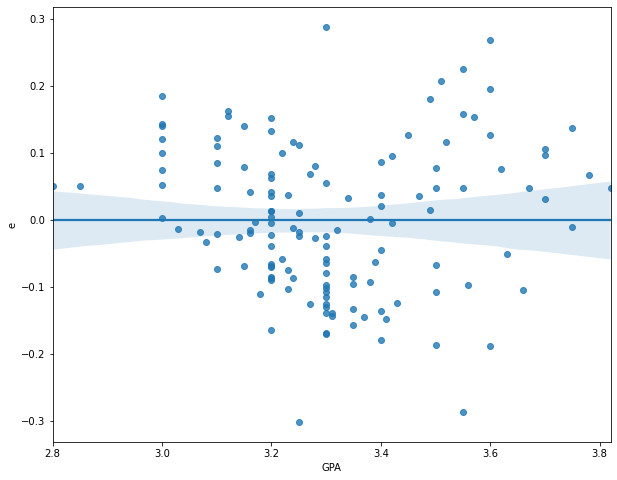

In [16]:
from augmentdata import augmentdata
lawsch85_=augmentdata(mod1)
sns.regplot(y='e',x='GPA',data=lawsch85_)


<AxesSubplot:xlabel='LSAT', ylabel='e2'>

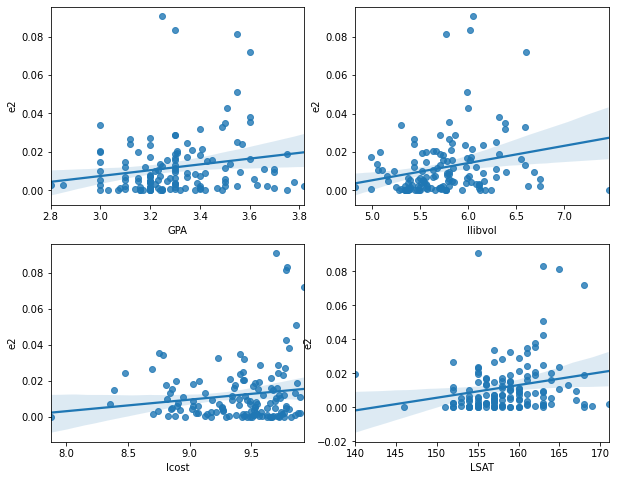

In [17]:
fig,ax=plt.subplots(2,2)
sns.regplot(y='e2',x='GPA',data=lawsch85_,ax=ax[0,0])
sns.regplot(y='e2',x='lcost',data=lawsch85_,ax=ax[1,0])
sns.regplot(y='e2',x='llibvol',data=lawsch85_,ax=ax[0,1])
sns.regplot(y='e2',x='LSAT',data=lawsch85_,ax=ax[1,1])

In [18]:
print('\nThe breuschpagan produced by Gretl is the "non-robust version" and the Whites test includes all the interaction terms')
bp1=breuschpagan(mod1.resid,mod1.model.exog,robust=False)
bp2=breuschpagan(mod1.resid,mod1.model.exog,robust=True)
wh=whites(mod1.resid,mod1.model.exog)
print('\nbreuschpagan:','LM',bp1[0],'LM-pval',bp1[1],': F',bp1[2],'F-pval',bp1[3])
print('\nbreuschpagan:','LM',bp2[0],'LM-pval',bp2[1],': F',bp2[2],'F-pval',bp2[3])
print('\nwhites      :','LM',wh[0],'LM-pval',wh[1],': F',wh[2],'F-pval',wh[3])
print('\nreset',reset(mod1,use_f=True,power=2))


The breuschpagan produced by Gretl is the "non-robust version" and the Whites test includes all the interaction terms

breuschpagan: LM 7.917697345982887 LM-pval 0.16083019876527224 : F 1.844860978308475 F-pval 0.10852572616944815

breuschpagan: LM 9.01067860404857 LM-pval 0.10863898167368498 : F 1.8448609783084633 F-pval 0.10852572616945046

whites      : LM 34.294634298067365 LM-pval 0.02419933727055263 : F 1.9388765366795213 F-pval 0.015678035451648115

reset <F test: F=array([[96.84541552]]), p=2.175543392461353e-17, df_denom=129, df_num=1>


C:\Users\aes05kgb\Anaconda3\lib\site-packages\statsmodels\stats\diagnostic.py:1263: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  aug = res.fittedvalues[:, None]


In [19]:
#You can see the regresson produced by Gretltests file which gives the result below
out=gretltests.breuschpagan(mod1)
print(out.summary())


gretl_LMtest 7.917697345982887 P-value 0.16083019876527224
                            OLS Regression Results                            
Dep. Variable:                      0   R-squared:                       0.066
Model:                            OLS   Adj. R-squared:                  0.030
Method:                 Least Squares   F-statistic:                     1.845
Date:                Sat, 07 Jan 2023   Prob (F-statistic):              0.109
Time:                        09:20:46   Log-Likelihood:                -226.66
No. Observations:                 136   AIC:                             465.3
Df Residuals:                     130   BIC:                             482.8
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------

In [20]:
#There are several forms of robust standard errors, below is HC1, it is very slightly different to gretl
form1='lsalary~GPA+llibvol+lcost+LSAT+rank'
mod2=ols(form1,lawsch85).fit(cov_type='HC1')
print(mod2.summary())

                            OLS Regression Results                            
Dep. Variable:                lsalary   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.836
Method:                 Least Squares   F-statistic:                     126.5
Date:                Sat, 07 Jan 2023   Prob (F-statistic):           3.52e-48
Time:                        09:20:46   Log-Likelihood:                 107.33
No. Observations:                 136   AIC:                            -202.7
Df Residuals:                     130   BIC:                            -185.2
Df Model:                           5                                         
Covariance Type:                  HC1                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      8.3432      0.521     16.000      0.0